In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')

In [3]:
df.sample(20)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
149448,211644,09/07/13,9190,217777,235.8375,270.0375,0,0,22
139022,196854,07/05/13,9164,216418,110.4375,110.4375,0,0,133
41682,58950,26/09/11,8058,222765,234.4125,234.4125,0,0,48
46481,65711,24/10/11,8562,320485,205.9125,205.9125,0,0,29
63112,89308,30/01/12,9532,219844,230.8500,230.8500,0,0,44
22298,31551,30/05/11,9043,219029,272.8875,327.0375,0,0,8
9684,13679,14/03/11,9178,223153,212.3250,212.3250,0,0,19
14636,20703,11/04/11,9611,216418,105.4500,104.0250,0,1,181
100874,142785,18/09/12,9112,222087,180.2625,227.2875,0,0,106
61285,86714,23/01/12,8023,216418,88.3500,103.3125,0,1,297


In [4]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)
df = df.drop('week', axis=1)
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('units_sold', axis=1), df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [7]:
model.score(X_test, y_test)

0.7774302522857642

In [8]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

rmse

27.02368261324411

In [9]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

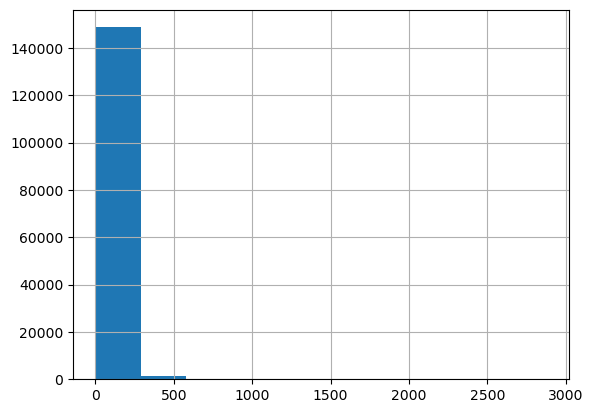

In [10]:
df.units_sold.hist()

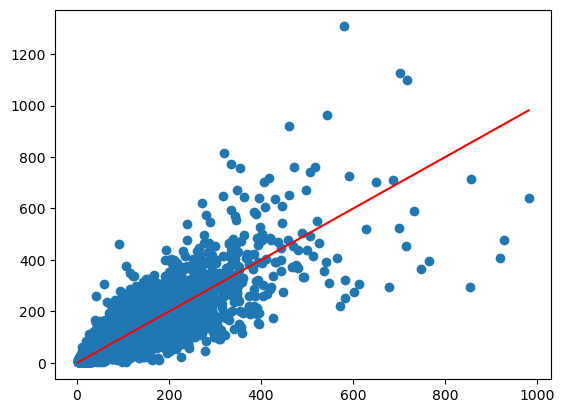

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_pred.max()), color='red')

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 150, 200],
    'min_samples_split': [2, 3]
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=   4.8s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=   4.5s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=   4.2s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=   5.8s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=   6.1s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=   5.9s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   0.4s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   0.4s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3],
                         'n_estimators': [10, 150, 200]},
             verbose=2)

In [13]:
best_model = grid_search.best_estimator_

In [14]:
grid_search.best_params_

{'min_samples_split': 2, 'n_estimators': 150}

In [15]:
best_model.score(X_test, y_test)

0.7769804272150658